In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [96]:
data = pd.read_csv("hackathon_data.csv", low_memory=False)
data.drop(data.columns[[0, 7, 11, 12]], axis=1, inplace=True)

data.head()

,Marka,IsyeriTipi,UyeDurum,UyeAdres,Sehir,UyeAktivasyonTarih,IslemTarih,IslemTutar,Tercih
0,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,2015-09-18 14:35:04,5.00,CeptePos
1,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,2019-04-13 13:31:00,32.70,ÖKC
2,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,2019-04-13 19:30:00,998.05,ÖKC
3,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,2019-04-14 13:52:00,105.75,ÖKC
4,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,2019-04-14 15:09:00,163.00,ÖKC


In [97]:
data = pd.DataFrame(data)

# Convert the "IslemTarih" column to datetime format
data["IslemTarih"] = pd.to_datetime(data["IslemTarih"], format="%Y-%m-%d %H:%M:%S")

# Add a new column for the day of the week
data["DayOfWeek"] = data["IslemTarih"].dt.day_name()

brands = data.Marka.unique()
brands
# Print the updated DataFrame
#data.head()

array(['Kzar kü pazar', 'Teri tejileri', 'Aida aka gida', 'Hdeo he video',
       'Hiye hatasiye', 'Hkek haan kek', 'Wtma waarıtma', 'Ayon arvasyon',
       'Eşti ekd. şti', 'Took tatawook', 'Wsky woversky', 'Ka.ş kiva a.ş',
       'Bant boaurant', 'Asua axaxesua', 'Rimi renetimi', 'Öeti ödirketi',
       'Kayi kol bayi', 'Aüfe ass büfe', 'Biye bakaliye', 'Llım leazılım',
       'Nfka nu yufka', 'Kıda kaz gıda', 'Küfe kar büfe', 'Hs 3 hy sis 3',
       'Aket akmarket', 'Sesi suzanesi', 'Eket ermarket', 'Ezgi ezezgi',
       'Bkal babakkal', 'Örek öz börek', 'Oden o- maden', 'Giye göhafiye',
       'Alik arncilik', 'Mand mad land', 'Blas burillas', 'Bant baaurant',
       'Aziz ab leziz', 'Dkli doymakli', 'Öket özmarket'], dtype=object)

In [98]:
data['IslemTarih'] = pd.to_datetime(data['IslemTarih'])

# Define the time bins
time_bins = [0, 7, 11, 14, 17, 19, 24]  # Custom bins for midnight, morning, afternoon, and evening

# Create labels for the time bins
time_labels = ['Gece', 'Sabah', 'Ogle Arası', 'Mesai', 'Is Cıkıs', 'Aksam']

# Categorize payments into time bins
data['PaymentTimeCategory'] = pd.cut(data['IslemTarih'].dt.hour, bins=time_bins, labels=time_labels)

# Group the data by company_name and PaymentTimeCategory and count the occurrences
grouped = data.groupby(['Marka', 'PaymentTimeCategory']).size().reset_index(name='count')

# Find the time categories at which each company pays the most
most_payment_time_categories = grouped.groupby('Marka')['count'].idxmax()

# Display the results
most_payment_time_categories = grouped.loc[most_payment_time_categories]

# Calculate the total count for each time category
total_count_by_time_category = grouped.groupby('PaymentTimeCategory')['count'].sum().reset_index(name='TotalCount')

# Count how many 'Marka' have their most payment time category for each time category
most_payment_time_categories_count = most_payment_time_categories.groupby('PaymentTimeCategory')['count'].count().reset_index(name='CountOfMarka')

# Print the results
print("\nTotal Count by Time Category:")
print(total_count_by_time_category)
print("\n\n")
print("\nCount of 'Marka' for Each Time Category:")
print(most_payment_time_categories_count)


Total Count by Time Category:
  PaymentTimeCategory  TotalCount
0                Gece       19405
1               Sabah      136317
2          Ogle Arası      222710
3               Mesai      273722
4            Is Cıkıs      179469
5               Aksam      158253




Count of 'Marka' for Each Time Category:
  PaymentTimeCategory  CountOfMarka
0                Gece             0
1               Sabah             8
2          Ogle Arası             6
3               Mesai            15
4            Is Cıkıs             0
5               Aksam            10


In [99]:
# Assuming 'IslemTarih' is already converted to a datetime column

# Extract the day of the week (0 = Monday, 6 = Sunday)
data['DayOfWeek'] = data['IslemTarih'].dt.dayofweek

# Create labels for the days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Map the day of the week values to day labels
data['DayOfWeekLabel'] = data['DayOfWeek'].map(dict(enumerate(day_labels)))

# Group the data by 'Marka' and 'DayOfWeekLabel' and count the occurrences
grouped_day = data.groupby(['Marka', 'DayOfWeekLabel']).size().reset_index(name='count')

# Find the day of the week at which each company pays the most
most_payment_day = grouped_day.groupby('Marka')['count'].idxmax()

# Display the results
most_payment_day = grouped_day.loc[most_payment_day]

# Calculate the total count for each day of the week
total_count_by_day = grouped_day.groupby('DayOfWeekLabel')['count'].sum().reset_index(name='TotalCount')

# Count how many 'Marka' have their most payment day for each day of the week
most_payment_day_count = most_payment_day.groupby('DayOfWeekLabel')['count'].count().reset_index(name='CountOfMarka')
sum_by_marka_most_payment_day = data[data['Marka'].isin(most_payment_day['Marka'])].groupby(['Marka', 'DayOfWeekLabel'])['IslemTutar'].sum().reset_index(name='TotalIslemTutar')


# Group the data by 'Marka', 'PaymentTimeCategory', and calculate the sum of 'IslemTutar'
sum_by_marka_time_category = data.groupby(['Marka', 'PaymentTimeCategory'])['IslemTutar'].sum().reset_index(name='TotalIslemTutar')

# Merge the 'sum_by_marka_time_category' DataFrame with 'most_payment_time_categories' to include the most payment time categories
result = pd.merge(most_payment_time_categories, sum_by_marka_time_category, on=['Marka', 'PaymentTimeCategory'])

most_payment_day = pd.merge(most_payment_day, sum_by_marka_most_payment_day, on=['Marka', 'DayOfWeekLabel'])

most_payment_day_sum = data.groupby('DayOfWeekLabel')['IslemTutar'].sum().reset_index(name='AmountOfSum')
sum_day = pd.merge(most_payment_day_count, most_payment_day_sum, on=['DayOfWeekLabel'])
sum_day = pd.merge(sum_day, total_count_by_day, on=['DayOfWeekLabel'])

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['IslemTarih'])

# Convert the 'Timestamp' column to a datetime object
df['IslemTarih'] = pd.to_datetime(df['IslemTarih'])

# Group the data by day
grouped = df.groupby(df['IslemTarih'].dt.date)

# Count the number of data points for each day
payment_count_day_by_day = grouped.size().reset_index(name='Count')

In [100]:
q1 = data['IslemTutar'].quantile(0.25)
q3 = data['IslemTutar'].quantile(0.75)
iqr = q3 - q1
iki_iqr_uzaklik = 1.5 * iqr
data['IslemTutarAnomaly'] = data[~((data.IslemTutar < (q1 - iki_iqr_uzaklik)) | (data.IslemTutar > (q3 + iki_iqr_uzaklik)))]['IslemTutar']
data['IslemTutarAnomaly'] = data['IslemTutarAnomaly'].fillna(0)

In [101]:
currency = pd.read_csv("usd.csv")
currency = currency.drop(columns=["Open", "High", "Low", "Vol.", "Change %"])
currency['Date'] = pd.to_datetime(currency['Date'])
date_range = pd.date_range(start=currency['Date'].min(), end=currency['Date'].max(), freq='D')
full_df = pd.DataFrame({'Date': date_range})
full_df = full_df.merge(currency, on='Date', how='left')
full_df['Price'] = full_df['Price'].fillna(method='ffill')


In [102]:
data['IslemTarih'] = pd.to_datetime(data['IslemTarih'])
data['IslemTarih_Date'] = pd.to_datetime(data['IslemTarih'].dt.date)
data.head()
dolar_kuru = []
full_df = full_df.groupby('Date')['Price'].first().reset_index()
data = data.merge(full_df, how='left', left_on='IslemTarih_Date', right_on='Date')

#data["dolar"] = dolar_kuru
data['DolarTutar'] = data['IslemTutar'] / data['Price']
data.drop(['Price', 'Date'], axis=1, inplace=True)
data.sample(20)


,Marka,IsyeriTipi,UyeDurum,UyeAdres,Sehir,UyeAktivasyonTarih,IslemTarih,IslemTutar,Tercih,DayOfWeek,PaymentTimeCategory,DayOfWeekLabel,IslemTutarAnomaly,IslemTarih_Date,DolarTutar
3199,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,2019-08-16 21:21:00,109.77,ÖKC,4,Aksam,Friday,109.77,2019-08-16,19.677333
694448,Eket ermarket,Şahıs Şirketi,Pasif,CUMHURİYET MAH. 1.KARANFİL SK. 60 -2A 1 KÜÇÜKÇ...,İstanbul,2018-03-22 13:33:45,2022-08-07 22:01:00,32.00,ÖKC,6,Aksam,Sunday,32.00,2022-08-07,1.786452
801115,Alik arncilik,Tüzel Şirket,Pasif,KEMALPAŞA MAH. HALKALI CAD. ATA İŞ MERKEZİ 103...,İstanbul,2018-10-23 19:05:38,2022-10-11 13:16:00,20.00,ÖKC,1,Ogle Arası,Tuesday,20.00,2022-10-11,1.079383
842810,Blas burillas,Şahıs Şirketi,Aktif,CEVİZLİ MAH. MUSTAFA KEMAL CAD. HUKUKÇULAR TOW...,İstanbul,2018-11-21 13:29:14,2020-09-02 13:41:00,101.50,ÖKC,2,Ogle Arası,Wednesday,101.50,2020-09-02,13.630382
744030,Örek öz börek,Şahıs Şirketi,Pasif,YENİDOĞAN MAH. AKIN CAD. 5 1 SANCAKTEPE/ İSTANBUL,İstanbul,2020-02-20 14:07:37,2022-03-19 08:40:00,30.00,ÖKC,5,Sabah,Saturday,30.00,2022-03-19,2.025795
659574,Eket ermarket,Şahıs Şirketi,Pasif,CUMHURİYET MAH. 1.KARANFİL SK. 60 -2A 1 KÜÇÜKÇ...,İstanbul,2018-03-22 13:33:45,2020-08-07 14:22:00,36.50,ÖKC,4,Ogle Arası,Friday,36.50,2020-08-07,5.004044
355366,Biye bakaliye,Şahıs Şirketi,Aktif,HIRKA-İ ŞERİF MAH. YAMAK SK. NO: 4 İÇ KAPI NO:...,İstanbul,2018-01-10 15:40:18,2021-11-12 15:51:00,38.00,ÖKC,4,Mesai,Friday,38.00,2021-11-12,3.808226
32257,Aida aka gida,Tüzel Şirket,Aktif,KOCATEPE MAH. ŞEHİR PARKI CAD NO: 105 İÇ KAPI ...,İstanbul,2014-09-10 12:54:01,2023-02-15 16:42:00,36.00,ÖKC,2,Mesai,Wednesday,36.00,2023-02-15,1.911031
539317,Kıda kaz gıda,Şahıs Şirketi,Aktif,GÜLTEPE MAH. SERHAT SK. 9 KÜÇÜKÇEKMECE/ İSTANBUL,İstanbul,2018-02-21 18:36:14,2018-09-08 23:58:30,62.00,ÖKC,5,Aksam,Saturday,62.00,2018-09-08,9.692043
209606,Wsky woversky,Tüzel Şirket,Aktif,ZAFER MAH. ÇINAR 1 SK. 5 B BAHÇELİEVLER/ İSTANBUL,İstanbul,2017-01-25 12:06:22,2019-10-18 12:01:20,60.00,CeptePos,4,Ogle Arası,Friday,60.00,2019-10-18,10.359295


In [103]:
q1 = data['DolarTutar'].quantile(0.25)
q3 = data['DolarTutar'].quantile(0.75)
iqr = q3 - q1
iki_iqr_uzaklik = 1.5 * iqr
data['DolarTutarAnomaly'] = data[~((data.DolarTutar < (q1 - iki_iqr_uzaklik)) | (data.DolarTutar > (q3 + iki_iqr_uzaklik)))]['DolarTutar']
data['DolarTutarAnomaly'] = data['DolarTutarAnomaly'].fillna(0)

In [104]:
data.drop(['DayOfWeek'], axis=1, inplace=True)

In [105]:
data.drop(['UyeAdres'], axis=1, inplace=True)

In [106]:
data.sample(20)

,Marka,IsyeriTipi,UyeDurum,Sehir,UyeAktivasyonTarih,IslemTarih,IslemTutar,Tercih,PaymentTimeCategory,DayOfWeekLabel,IslemTutarAnomaly,IslemTarih_Date,DolarTutar,DolarTutarAnomaly
984590,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2022-05-20 11:37:00,7.50,ÖKC,Sabah,Friday,7.50,2022-05-20,0.471588,0.471588
193937,Took tatawook,Tüzel Şirket,Aktif,Antalya,2016-12-27 19:42:50,2023-10-01 19:46:00,110.00,ÖKC,Is Cıkıs,Sunday,110.00,2023-10-01,4.013559,4.013559
345568,Biye bakaliye,Şahıs Şirketi,Aktif,İstanbul,2018-01-10 15:40:18,2020-11-15 18:34:00,26.00,ÖKC,Is Cıkıs,Sunday,26.00,2020-11-15,3.377676,3.377676
713618,Eket ermarket,Şahıs Şirketi,Pasif,İstanbul,2018-03-22 13:33:45,2023-05-30 20:34:00,117.00,ÖKC,Aksam,Tuesday,117.00,2023-05-30,5.674048,5.674048
814795,Mand mad land,Şahıs Şirketi,Pasif,İzmir,2018-11-19 11:18:13,2019-08-29 21:25:00,81.64,ÖKC,Aksam,Thursday,81.64,2019-08-29,13.979452,13.979452
307942,Aüfe ass büfe,Tüzel Şirket,Pasif,İstanbul,2022-12-10 15:38:46,2020-08-27 12:02:00,21.50,ÖKC,Ogle Arası,Thursday,21.50,2020-08-27,2.931991,2.931991
962594,Dkli doymakli,Tüzel Şirket,Pasif,Ankara,2018-12-28 14:50:22,2020-01-06 22:21:00,91.00,ÖKC,Aksam,Monday,91.00,2020-01-06,15.241349,15.241349
198052,Wsky woversky,Tüzel Şirket,Aktif,İstanbul,2017-01-25 12:06:22,2018-12-21 11:03:17,100.00,CeptePos,Sabah,Friday,100.00,2018-12-21,18.803708,18.803708
105703,Hiye hatasiye,Şahıs Şirketi,Pasif,Manisa,2019-07-19 14:53:05,2019-11-09 17:20:00,20.00,ÖKC,Mesai,Saturday,20.00,2019-11-09,3.468128,3.468128
304197,Aüfe ass büfe,Tüzel Şirket,Pasif,İstanbul,2022-12-10 15:38:46,2019-11-22 08:43:00,4.50,ÖKC,Sabah,Friday,4.50,2019-11-22,0.787650,0.787650


In [107]:
data_anomaly = data[data['DolarTutarAnomaly'] != 0]

In [108]:
data_anomaly

,Marka,IsyeriTipi,UyeDurum,Sehir,UyeAktivasyonTarih,IslemTarih,IslemTutar,Tercih,PaymentTimeCategory,DayOfWeekLabel,IslemTutarAnomaly,IslemTarih_Date,DolarTutar,DolarTutarAnomaly
0,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2015-09-18 14:35:04,5.00,CeptePos,Ogle Arası,Friday,5.00,2015-09-18,1.663894,1.663894
1,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-13 13:31:00,32.70,ÖKC,Ogle Arası,Saturday,32.70,2019-04-13,5.667932,5.667932
3,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-14 13:52:00,105.75,ÖKC,Ogle Arası,Sunday,105.75,2019-04-14,18.329780,18.329780
10,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-14 20:14:00,102.70,ÖKC,Aksam,Sunday,102.70,2019-04-14,17.801120,17.801120
20,Kzar kü pazar,Tüzel Şirket,Aktif,Samsun,2015-09-08 15:08:23,2019-04-16 20:37:00,100.95,ÖKC,Aksam,Tuesday,100.95,2019-04-16,17.494454,17.494454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 21:35:00,16.50,ÖKC,Aksam,Friday,16.50,2023-06-09,0.705173,0.705173
999996,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 21:44:00,77.00,ÖKC,Aksam,Friday,77.00,2023-06-09,3.290809,3.290809
999997,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 22:01:00,37.00,ÖKC,Aksam,Friday,37.00,2023-06-09,1.581298,1.581298
999998,Öket özmarket,Şahıs Şirketi,Pasif,Gaziantep,2019-01-31 15:47:21,2023-06-09 22:15:00,80.00,ÖKC,Aksam,Friday,80.00,2023-06-09,3.419023,3.419023


In [109]:
whiskey = data_anomaly[data_anomaly["Marka"]==brands[10]]

In [110]:
whiskey.sample()

,Marka,IsyeriTipi,UyeDurum,Sehir,UyeAktivasyonTarih,IslemTarih,IslemTutar,Tercih,PaymentTimeCategory,DayOfWeekLabel,IslemTutarAnomaly,IslemTarih_Date,DolarTutar,DolarTutarAnomaly
201763,Wsky woversky,Tüzel Şirket,Aktif,İstanbul,2017-01-25 12:06:22,2021-02-17 14:07:14,110.0,CeptePos,Ogle Arası,Wednesday,110.0,2021-02-17,15.779432,15.779432


In [111]:
x = whiskey["IslemTarih"].dt.hour + whiskey["IslemTarih"].dt.minute / 60

In [112]:
x

194791    11.350000
194793    11.250000
194794    11.250000
194795    11.250000
194796    11.250000
            ...    
220198    12.000000
220200    21.433333
220204    15.366667
220224    15.066667
220278    11.216667
Name: IslemTarih, Length: 19835, dtype: float64

In [113]:
y = whiskey["DolarTutar"]

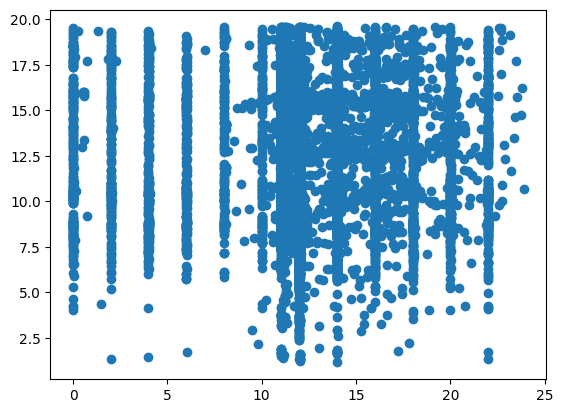

In [114]:
plt.scatter(x,y)

In [115]:
from sklearn.cluster import KMeans
import numpy as np

In [116]:
data_kmeans = pd.DataFrame({'x':x, 'y': y})

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data_kmeans)
scaled_df = pd.DataFrame(scaled_values, columns=data_kmeans.columns)

In [119]:
scaled_df

,x,y
0,0.474895,0.820516
1,0.470711,0.680533
2,0.470711,0.682987
3,0.470711,0.700543
4,0.470711,0.705868
...,...,...
19830,0.502092,0.180502
19831,0.896792,0.542082
19832,0.642957,0.383400
19833,0.630404,0.825703


In [120]:
data_kmeans = scaled_df

In [121]:
data_kmeans

,x,y
0,0.474895,0.820516
1,0.470711,0.680533
2,0.470711,0.682987
3,0.470711,0.700543
4,0.470711,0.705868
...,...,...
19830,0.502092,0.180502
19831,0.896792,0.542082
19832,0.642957,0.383400
19833,0.630404,0.825703


In [122]:
x

194791    11.350000
194793    11.250000
194794    11.250000
194795    11.250000
194796    11.250000
            ...    
220198    12.000000
220200    21.433333
220204    15.366667
220224    15.066667
220278    11.216667
Name: IslemTarih, Length: 19835, dtype: float64

In [123]:
data_kmeans

,x,y
0,0.474895,0.820516
1,0.470711,0.680533
2,0.470711,0.682987
3,0.470711,0.700543
4,0.470711,0.705868
...,...,...
19830,0.502092,0.180502
19831,0.896792,0.542082
19832,0.642957,0.383400
19833,0.630404,0.825703


In [124]:
kmeans = KMeans(n_clusters=5)  # Küme sayısı: 3
kmeans.fit(data_kmeans)

C:\Users\furka\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [125]:
kume_merkezleri = kmeans.cluster_centers_
kume_etiketleri = kmeans.labels_

In [126]:
kume_merkezleri[0]

array([0.4969599, 0.5671798])

In [127]:
kume_etiketleri

array([1, 0, 0, ..., 4, 1, 0])

In [128]:
colors = ['red', 'blue', 'green']

In [129]:
data_kmeans["kume_etiketleri"] = kume_etiketleri
data_kmeans["x2"] = x.values
data_kmeans["y2"] = y.values

In [130]:
data_kmeans[data_kmeans.x == kume_merkezleri[0][0]]

,x,y,kume_etiketleri,x2,y2


In [131]:
dir(scaler)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_reset',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'clip',
 'copy',
 'data_max_',
 'data_min_',
 'data_range_',
 'feature_names_in_',
 'feature_range',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'inverse_transform',
 'min_',
 'n_features_in_',
 'n_samples_seen_',
 'partial_fit',
 'scale_',
 'set_output',
 'set_params',
 'transform

In [132]:
kume_merkezleri[0]

array([0.4969599, 0.5671798])

In [133]:
scaler.inverse_transform(kume_merkezleri[0].reshape(1,-1))

array([[11.87734151, 11.61875666]])

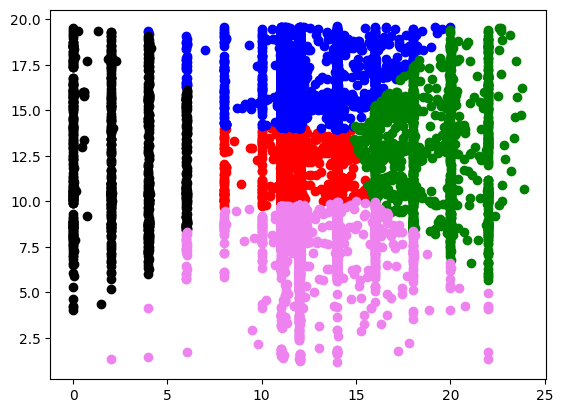

In [134]:
plt.scatter(data_kmeans[data_kmeans["kume_etiketleri"]==0]["x2"], data_kmeans[data_kmeans["kume_etiketleri"]==0]["y2"], color="red")
plt.scatter(data_kmeans[data_kmeans["kume_etiketleri"]==1]["x2"], data_kmeans[data_kmeans["kume_etiketleri"]==1]["y2"], color="blue")
plt.scatter(data_kmeans[data_kmeans["kume_etiketleri"]==2]["x2"], data_kmeans[data_kmeans["kume_etiketleri"]==2]["y2"], color="green")
plt.scatter(data_kmeans[data_kmeans["kume_etiketleri"]==3]["x2"], data_kmeans[data_kmeans["kume_etiketleri"]==3]["y2"], color="black")
plt.scatter(data_kmeans[data_kmeans["kume_etiketleri"]==4]["x2"], data_kmeans[data_kmeans["kume_etiketleri"]==4]["y2"], color="violet")

plt.show()